# Dataset Preprocessing

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.datasets import load_iris

iris = load_iris()

X = np.array([list(iris.data[i]) for i in range(len(iris.data)) if iris.target[i] < 2])
y = np.array([iris.target[i] for i in range(len(iris.data)) if iris.target[i] < 2])



dataset = pd.read_csv('randomScatter4.csv')

X = np.array(dataset[['x', 'y']])
y = np.array([0 if z == 'a' else 1 if z =='b' else 2 if z == 'c' else 3 for z in dataset['z']])



# Model Training and Predicting

### TRAIN TEST SPLITTING DATA

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

### LOGISTIC REPGRESSION MODEL

In [20]:
logistic_model = LogisticRegression(max_iter=10000)

logistic_model.fit(X_train, y_train)

logitic_pred = logistic_model.predict(X_test)

### KNN MODEL

In [21]:
knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(X_train, y_train)

knn_pred = knn_model.predict(X_test) 

### RANDOM FOREST MODEL

In [22]:
random_model = RandomForestClassifier()

random_model.fit(X_train, y_train) 

random_pred = random_model.predict(X_test)

### Using Voting Classifier to Determine the best model

In [23]:
from sklearn.ensemble import VotingClassifier

voting_model = VotingClassifier(estimators=[('Knn', knn_model), ('Random', random_model)],
                                voting='hard',
                                weights=[0.5, 0.5]
                               )
voting_model.fit(X_train, y_train)

voting_pred = voting_model.predict(X_test)

# Stats Visualization and Comparison

### ACTUAL VS PREDICTED VALUES FOR ALL MODELS

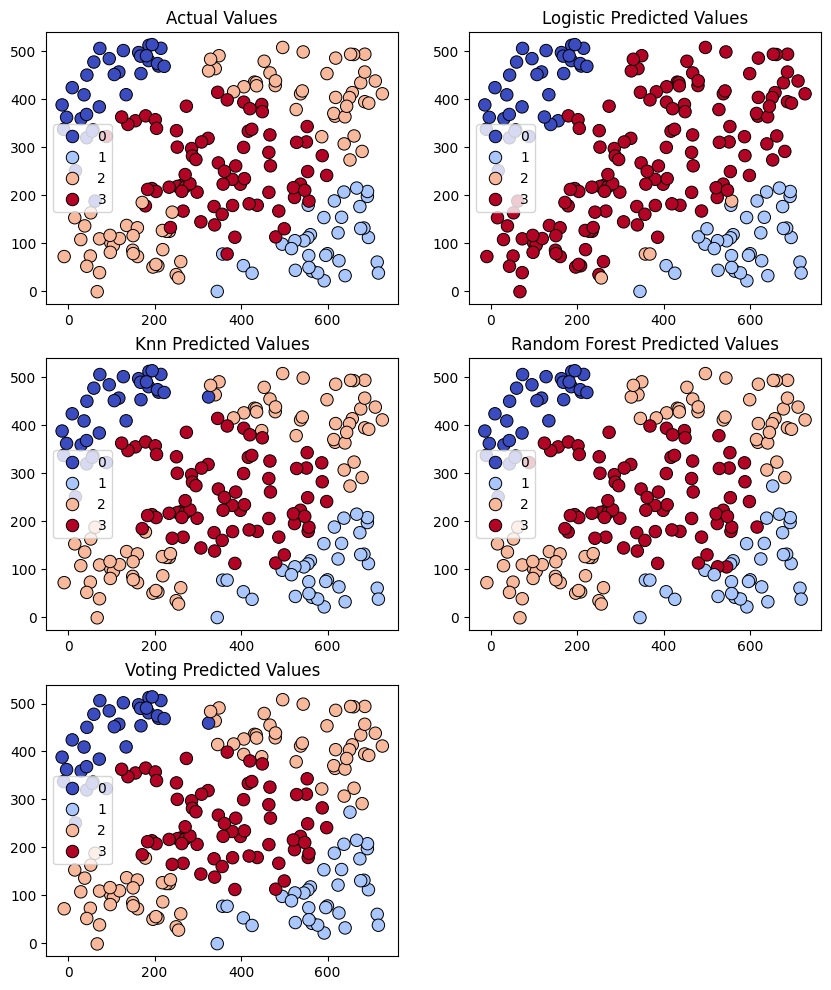

In [24]:

plt.figure(figsize=(10, 12))

kwargs = dict(palette='coolwarm', edgecolors='k', legend=True, x=X_test[:, 0], y=X_test[:, 1], s=80)

plt.subplot(3,2,1)
plt.title('Actual Values')
sns.scatterplot(hue=y_test, **kwargs)

plt.subplot(3,2,2)
plt.title('Logistic Predicted Values')
sns.scatterplot(hue=logitic_pred, **kwargs)

plt.subplot(3,2,3)
plt.title('Knn Predicted Values')
sns.scatterplot(hue=knn_pred, **kwargs)

plt.subplot(3,2,4) 
plt.title('Random Forest Predicted Values')
sns.scatterplot(hue=random_pred, **kwargs)

plt.subplot(3,2,5) 
plt.title('Voting Predicted Values')
sns.scatterplot(hue=voting_pred, **kwargs)

plt.show()


### Classification Report for each model

In [30]:
from sklearn.metrics import classification_report


cr_logistic, cr_knn, cr_random= classification_report(y_test, logitic_pred, output_dict=True), classification_report(y_test, knn_pred,output_dict=True), classification_report(y_test, random_pred,output_dict=True)
cr_voting = classification_report(y_test, voting_pred, output_dict=True)

In [31]:
df_logistic = pd.DataFrame(cr_logistic).transpose()
df_knn = pd.DataFrame(cr_knn).transpose()
df_random = pd.DataFrame(cr_random).transpose()
df_voting = pd.DataFrame(cr_voting).transpose()

df_logistic.pop('support')
df_knn.pop('support')
df_random.pop('support')
df_voting.pop('support')

0                32.000000
1                35.000000
2                74.000000
3                72.000000
accuracy          0.938967
macro avg       213.000000
weighted avg    213.000000
Name: support, dtype: float64

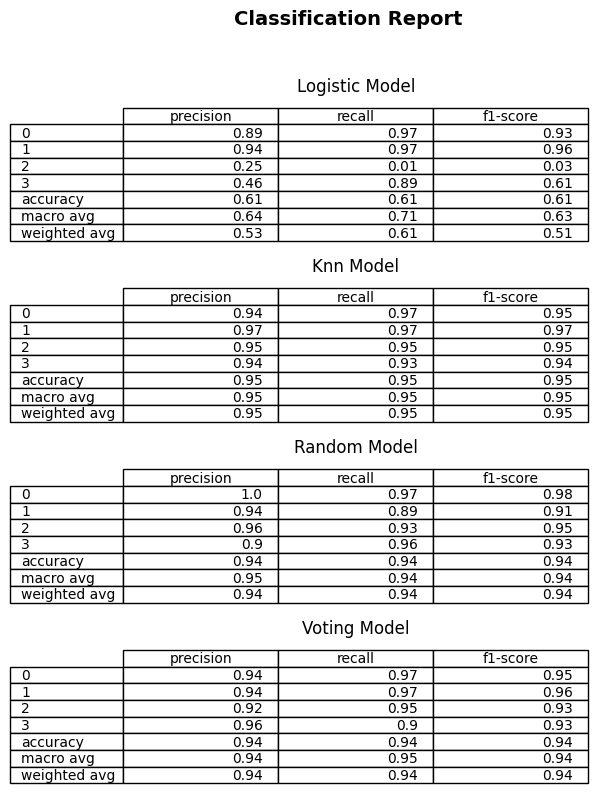

In [32]:
plt.figure(figsize=(6, 9))

plt.subplot(4,1,1)
plt.table(cellText=df_logistic.round(2).values, colLabels=df_logistic.columns, rowLabels=df_logistic.index, loc='center')
plt.axis('off')
plt.title('Logistic Model')


plt.subplot(4,1,2)
plt.table(cellText=df_knn.round(2).values, colLabels=df_knn.columns, rowLabels=df_knn.index, loc='center')
plt.axis('off')
plt.title('Knn Model')


plt.subplot(4,1,3)
plt.table(cellText=df_random.round(2).values, colLabels=df_random.columns, rowLabels=df_random.index, loc='center')
plt.axis('off')
plt.title('Random Model')

plt.subplot(4,1,4)
plt.table(cellText=df_voting.round(2).values, colLabels=df_voting.columns, rowLabels=df_voting.index, loc='center')
plt.axis('off')
plt.title('Voting Model')

plt.suptitle('Classification Report', fontweight='bold', fontsize='14')
plt.show()